<a href="https://colab.research.google.com/github/cleogrs/avanti/blob/main/Cl%C3%A9o_Gomes_da_Rocha_Santos_Detec%C3%A7%C3%A3o_de_Melanoma_Avanti_Bootcamp_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#important library:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
def count_items_folder(path, name):

  arquivos = os.listdir(path)

  numero_de_itens = len(arquivos)

  print(f"Número de itens na pasta {name}:", numero_de_itens)

In [ ]:
  benign_test_path = '/content/drive/MyDrive/melanoma/test/Benign/'
  malignant_test_path = '/content/drive/MyDrive/melanoma/test/Malignant/'
  benign_train_path = '/content/drive/MyDrive/melanoma/train/Benign/'
  malignant_train_path = '/content/drive/MyDrive/melanoma/train/Malignant/'

In [ ]:
count_items_folder(benign_test_path, "/content/drive/MyDrive/melanoma/test/Benign/")
count_items_folder(malignant_test_path, "/content/drive/MyDrive/melanoma/test/Malignant/")
count_items_folder(benign_train_path, "/content/drive/MyDrive/melanoma/train/Benign/")
count_items_folder(malignant_train_path, "/content/drive/MyDrive/melanoma/train/Malignant/")

Número de itens na pasta /content/drive/MyDrive/melanoma/test/Benign/: 1000
Número de itens na pasta /content/drive/MyDrive/melanoma/test/Malignant/: 1000
Número de itens na pasta /content/drive/MyDrive/melanoma/train/Benign/: 6290
Número de itens na pasta /content/drive/MyDrive/melanoma/train/Malignant/: 5614


In [ ]:
# Define constants
image_size = (224, 224)
batch_size = 32

# Define paths to the original training and test directories
train_dir = '/content/drive/MyDrive/melanoma/train/'
test_dir = '/content/drive/MyDrive/melanoma/test/'

# Define paths for the new training and validation directories
base_data_dir = '/content/drive/MyDrive/melanoma/split_data'
train_data_dir = os.path.join(base_data_dir, 'train')
validation_data_dir = os.path.join(base_data_dir, 'validation')

# Create directories for training and validation data if they don't exist
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(validation_data_dir, exist_ok=True)

def move_files(subdir, filenames, destination_dir):
    for filename in filenames:
        src = os.path.join(train_dir, subdir, filename)
        dst = os.path.join(destination_dir, subdir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

# Get the list of subdirectories in the original training directory
subdirectories = os.listdir(train_dir)

# Split the subdirectories into training and validation sets
for subdir in subdirectories:
    subdir_path = os.path.join(train_dir, subdir)
    filenames = os.listdir(subdir_path)
    train_filenames, validation_filenames = train_test_split(filenames, test_size=0.3, random_state=42)

    move_files(subdir, train_filenames, train_data_dir)
    move_files(subdir, validation_filenames, validation_data_dir)

# Define data generators with augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print the number of samples in each set
print("Number of samples in training set:", len(train_generator.classes))
print("Number of samples in validation set:", len(validation_generator.classes))
print("Number of samples in test set:", len(test_generator.classes))

Found 8332 images belonging to 2 classes.
Found 3572 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Number of samples in training set: 8332
Number of samples in validation set: 3572
Number of samples in test set: 2000


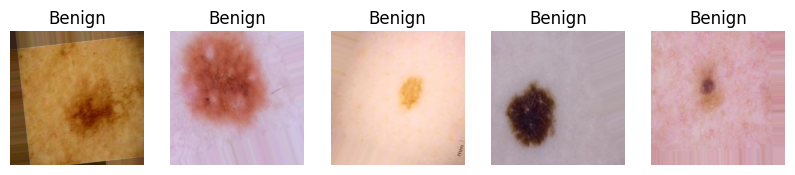

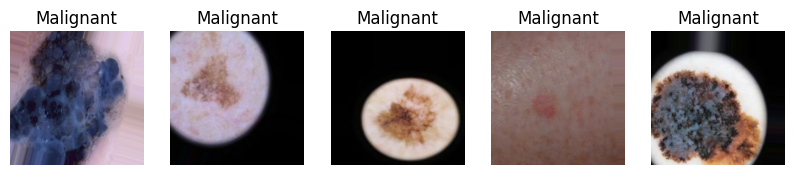

In [ ]:
# Define the number of images to plot from each class
num_images_per_class = 5

# Get class indices
class_indices = test_generator.class_indices

# Inverse mapping of class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_index, class_label in class_labels.items():
    # Find the first num_images_per_class images belonging to the current class
    class_images = [image for image, label in zip(train_generator[0][0], train_generator[0][1]) if label[class_index] == 1][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
    plt.show()

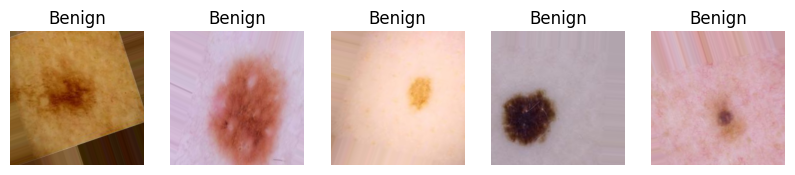

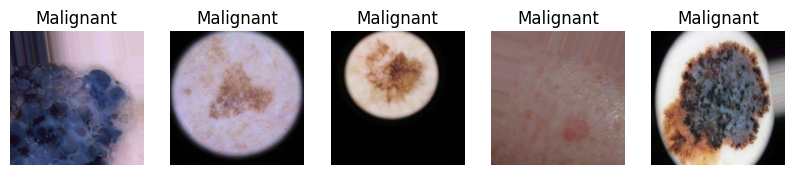

In [ ]:
# Define the number of images to plot from each class
num_images_per_class = 5

# Get class indices
class_indices = train_generator.class_indices

class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_index, class_label in class_labels.items():
    # Find the first num_images_per_class images belonging to the current class
    class_images = [image for image, label in zip(train_generator[0][0], train_generator[0][1]) if label[class_index] == 1][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
    plt.show()

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')
x = base_model.output
BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # L2 regularization
x = layers.Dropout(0.5)(x)
output = layers.Dense(2, activation='softmax', kernel_regularizer=l2(0.001))(x)  # L2 regularization
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)

model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

74836368/74836368 [==============================] - 3s 0us/step


In [ ]:
# Train the model and store the training history
history1 = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
261/261 [==============================] - 345s 872ms/step - loss: 0.8599 - accuracy: 0.8065 - val_loss: 0.5566 - val_accuracy: 0.8413
Epoch 2/15
261/261 [==============================] - 210s 804ms/step - loss: 0.5215 - accuracy: 0.8496 - val_loss: 0.4269 - val_accuracy: 0.8771
Epoch 3/15
261/261 [==============================] - 207s 793ms/step - loss: 0.4129 - accuracy: 0.8752 - val_loss: 0.3762 - val_accuracy: 0.8953
Epoch 5/15
261/261 [==============================] - 206s 787ms/step - loss: 0.3752 - accuracy: 0.8913 - val_loss: 0.3752 - val_accuracy: 0.8984
Epoch 6/15
261/261 [==============================] - 206s 790ms/step - loss: 0.3561 - accuracy: 0.8995 - val_loss: 0.3753 - val_accuracy: 0.8978
Epoch 7/15
261/261 [==============================] - 210s 804ms/step - loss: 0.3459 - accuracy: 0.9084 - val_loss: 0.3707 - val_accuracy: 0.9034
Epoch 8/15
261/261 [==============================] - 204s 781ms/step - loss: 0.3243 - accuracy: 0.9099 - val_loss: 0.3965 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

63/63 [==============================] - 844s 14s/step - loss: 0.3195 - accuracy: 0.9195
Test Accuracy: 0.9194999933242798


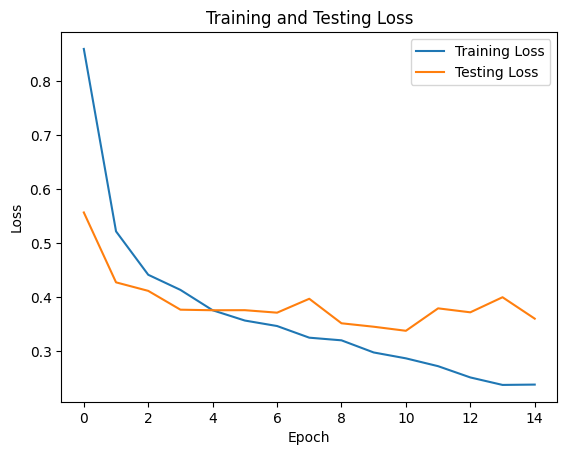

In [ ]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

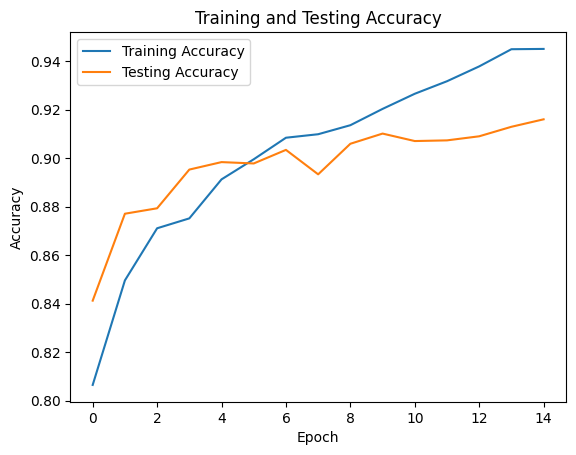

In [ ]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print('----------------------------------------------------------------------------------------------')

class_report = classification_report(true_labels, predicted_labels)

print("\nClassification Report:")
print(class_report)

63/63 [==============================] - 16s 169ms/step
Confusion Matrix:
[[951  49]
 [112 888]]
----------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1000
           1       0.95      0.89      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



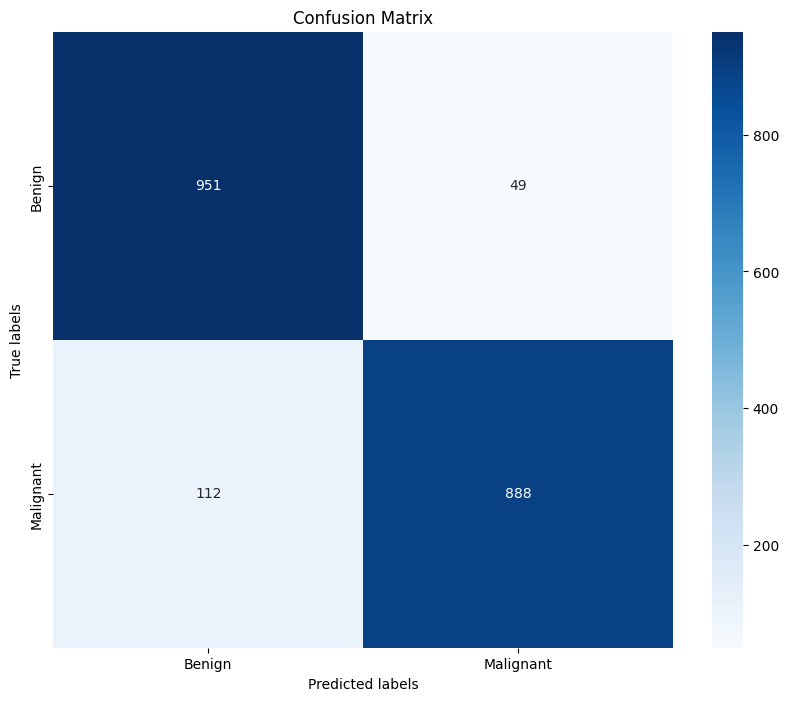

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()